# MODELO DE ML PARA DETECTAR TRANSACCIONES FRAUDULENTAS

### Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importar datos

In [2]:
df = pd.read_csv('data.csv')

In [3]:
# Usar la columna dob para calcular la edad de los clientes
df['dob'] = pd.to_datetime(df['dob'])
df['dob'] = df['dob'].dt.year
df['age'] = 2025 - df['dob']

In [4]:
df = df[['gender','lat', 'long', 'city_pop', 'age', 
        'category', 'amt','merch_lat', 'merch_long',
       'customer_num_trans_1_day', 'customer_num_trans_7_day',
       'customer_num_trans_30_day',  'trans_time_hrs',
       'trans_time_is_night', 'trans_time_day', 'trans_date_is_weekend',
       'customer_avg_amout_1_day', 'customer_avg_amount_7_day',
       'customer_avg_amount_30_day', 'merchant_num_trans_1_day',
       'merchant_num_trans_7_day', 'merchant_num_trans_30_day',
       'merchant_risk_1_day', 'merchant_risk_7_day', 'merchant_risk_30_day',
       'merchant_risk_90_day', 'is_fraud'
    
]]

In [5]:
# Renombrar columnas 
reemplazos = {

    'gender': 'género',
    'lat': 'latitud',
    'long': 'longitud',
    'city_pop': 'población de la ciudad',
    'category': 'categoría',
    'amt': 'monto',
    'merch_lat': 'latitud del comercio',
    'merch_long': 'longitud del comercio',
    'customer_num_trans_1_day': 'número de transacciones del cliente en 1 día',
    'customer_num_trans_7_day': 'número de transacciones del cliente en 7 días',
    'customer_num_trans_30_day': 'número de transacciones del cliente en 30 días',
    'trans_time_hrs': 'horas de la hora de transacción',
    'trans_time_is_night': 'la transacción es nocturna',
    'trans_time_day': 'día de la transacción',
    'trans_date_is_weekend': 'la transacción es en fin de semana',
    'customer_avg_amout_1_day': 'promedio de monto del cliente en 1 día',
    'customer_avg_amount_7_day': 'promedio de monto del cliente en 7 días',
    'customer_avg_amount_30_day': 'promedio de monto del cliente en 30 días',
    'merchant_num_trans_1_day': 'número de transacciones del comercio en 1 día',
    'merchant_num_trans_7_day': 'número de transacciones del comercio en 7 días',
    'merchant_num_trans_30_day': 'número de transacciones del comercio en 30 días',
    'merchant_risk_1_day': 'riesgo del comercio en 1 día',
    'merchant_risk_7_day': 'riesgo del comercio en 7 días',
    'merchant_risk_30_day': 'riesgo del comercio en 30 días',
    'rchant_risk_90_day': 'riesgo del comercio en 90 días',
    'age': 'edad',
}

df.rename(columns=reemplazos, inplace=True)

In [6]:
df

,género,latitud,longitud,población de la ciudad,edad,categoría,monto,latitud del comercio,longitud del comercio,número de transacciones del cliente en 1 día,...,promedio de monto del cliente en 7 días,promedio de monto del cliente en 30 días,número de transacciones del comercio en 1 día,número de transacciones del comercio en 7 días,número de transacciones del comercio en 30 días,riesgo del comercio en 1 día,riesgo del comercio en 7 días,riesgo del comercio en 30 días,merchant_risk_90_day,is_fraud
0,F,42.2786,-89.0361,189162,30,home,615.41,42.135340,-89.171111,2,...,18.27,6.97,4824.23,73065.81,141799.95,4,13,20,14,0
1,M,37.5833,-120.9496,42753,68,grocery_pos,61.56,36.664667,-120.679995,4,...,77.27,8.06,3243.55,51496.77,1093950.50,3,10,11,28,0
2,F,42.8371,-78.7484,564824,36,misc_net,58.63,42.005869,-79.210680,0,...,67.47,43.41,4242.22,26384.49,1005859.33,6,14,23,48,0
3,M,41.7698,-72.2011,4821,65,grocery_pos,67.88,41.619398,-72.737010,0,...,58.22,52.05,4303.16,3476.36,226662.34,3,11,14,14,0
4,F,33.8186,-117.9729,354475,48,grocery_net,39.73,33.937114,-117.324680,0,...,44.64,24.65,2424.13,32215.14,36989.60,2,13,16,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8580250,M,26.5955,-80.1291,215808,74,misc_net,8.39,26.746673,-79.452411,2,...,44.75,63.60,278.79,60394.79,749787.52,0,10,17,43,0
8580251,F,40.3351,-75.8750,213013,44,personal_care,24.12,40.974102,-76.264288,5,...,68.70,34.44,583.03,62256.81,458776.62,7,10,13,20,0
8580252,M,34.2007,-118.5391,74363,30,misc_pos,18.34,33.242981,-119.259757,3,...,20.41,31.97,4574.35,35381.57,690950.01,7,11,21,17,0
8580253,M,31.9713,-97.3463,10115,56,home,32.08,31.833062,-97.062674,3,...,27.60,20.19,1957.23,44931.45,259878.19,1,12,18,42,0


In [7]:
df['is_fraud'].value_counts()

is_fraud
0    8485449
1      94806
Name: count, dtype: int64

In [8]:
# Concatenar is_fraud cuando es 1 y una muestra de is_fraud cuando es 0 de manera aleatoria que se balancen los datos
df = pd.concat([df[df['is_fraud'] == 1], df[df['is_fraud'] == 0].sample(n=94806)], axis=0)

In [9]:
df['is_fraud'].value_counts()

is_fraud
1    94806
0    94806
Name: count, dtype: int64

## Definir X y Y

Primero definimos nuestras caracteristicas (X) y nuestro objetivo (y).

In [10]:
y = df['is_fraud']
x = df.drop(columns=['is_fraud'])

## Dividir las características en numéricas y no numéricas

In [11]:
# Separar columnas numericas y categoricas
x_num = x.select_dtypes(include=[np.number])
x_cat = x.select_dtypes(exclude=[np.number])

## Procesamiento de caracteristicas no numéricas (one-hot encoding)

In [12]:
# Usar OneHotEncoder para las columnas categoricas
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder( sparse_output=False)
x_cat_encoded = encoder.fit_transform(x_cat)

In [13]:
# Crear un dataframe con las columnas ya codificadas y renombrar las columnas
x_cat_encoded = pd.DataFrame(x_cat_encoded, columns=encoder.get_feature_names_out(x_cat.columns))

## Estandarizar

## Tratamiento de características numéricas (StandardScaler)

In [14]:
# Estandarizar las columnas numericas
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_num_scaled = scaler.fit_transform(x_num)

In [27]:
mu = scaler.mean_  # Media
sigma = scaler.scale_  
print(mu)
print(sigma)

[ 3.74779516e+01 -9.21523233e+01  2.89689818e+05  4.95168502e+01
  3.04694601e+02  3.74779292e+01 -9.21522445e+01  3.00460414e+00
  5.49952007e+00  1.29995728e+01  1.14947946e+01  2.92296901e-01
  3.37482332e+00  3.59861190e-01  4.54711548e+01  4.55640954e+01
  3.55358177e+01  2.55174066e+03  5.04325218e+04  5.55199155e+05
  3.49791680e+00  9.25091239e+00  1.61376601e+01  2.96401968e+01]
[5.22721137e+00 1.65699340e+01 5.57962831e+05 1.87192987e+01
 3.81522447e+02 5.25980449e+00 1.65797197e+01 1.99764774e+00
 2.62871601e+00 3.12330452e+00 6.92203450e+00 4.54818011e-01
 1.97604733e+00 4.79959492e-01 2.56412844e+01 2.57108573e+01
 1.99023566e+01 1.41401020e+03 2.85854143e+04 3.14511983e+05
 2.29287225e+00 3.83262307e+00 4.79344944e+00 1.22455948e+01]


In [34]:
#Crear dos diccionarios con los valores de mu y sigma, con los nombres de las columnas
mu_dict = dict(zip(x_num.columns, mu))
sigma_dict = dict(zip(x_num.columns, sigma))


In [35]:
mu_dict

{'latitud': 37.477951556863495,
 'longitud': -92.15232327648042,
 'población de la ciudad': 289689.81822353014,
 'edad': 49.51685019935447,
 'monto': 304.6946011328398,
 'latitud del comercio': 37.47792923643546,
 'longitud del comercio': -92.15224454220724,
 'número de transacciones del cliente en 1 día': 3.0046041389785456,
 'número de transacciones del cliente en 7 días': 5.499520072569247,
 'número de transacciones del cliente en 30 días': 12.99957281184735,
 'horas de la hora de transacción': 11.49479463325106,
 'la transacción es nocturna': 0.29229690104001854,
 'día de la transacción': 3.374823323418349,
 'la transacción es en fin de semana': 0.35986119022002827,
 'promedio de monto del cliente en 1 día': 45.47115477923338,
 'promedio de monto del cliente en 7 días': 45.56409536316267,
 'promedio de monto del cliente en 30 días': 35.53581772250702,
 'número de transacciones del comercio en 1 día': 2551.7406600320655,
 'número de transacciones del comercio en 7 días': 50432.52178

In [36]:
sigma_dict

{'latitud': 5.2272113688829,
 'longitud': 16.569934035170252,
 'población de la ciudad': 557962.831076326,
 'edad': 18.719298664733376,
 'monto': 381.522447005141,
 'latitud del comercio': 5.259804491321999,
 'longitud del comercio': 16.57971972170049,
 'número de transacciones del cliente en 1 día': 1.9976477377979904,
 'número de transacciones del cliente en 7 días': 2.6287160100631977,
 'número de transacciones del cliente en 30 días': 3.1233045231999834,
 'horas de la hora de transacción': 6.922034501739091,
 'la transacción es nocturna': 0.4548180105079615,
 'día de la transacción': 1.9760473300918984,
 'la transacción es en fin de semana': 0.47995949203391414,
 'promedio de monto del cliente en 1 día': 25.64128442002452,
 'promedio de monto del cliente en 7 días': 25.710857306767856,
 'promedio de monto del cliente en 30 días': 19.902356626744083,
 'número de transacciones del comercio en 1 día': 1414.0102027222517,
 'número de transacciones del comercio en 7 días': 28585.4143283

In [30]:
# Desescalar manualmente
x_num_manual = x_num_scaled * sigma + mu

In [31]:
print("Datos originales:")
print(x_num)


#usar round para redonder los valores
print("Datos desescalados manualmente:")
print(pd.DataFrame(x_num_manual, columns=x_num.columns).round(2))

Datos originales:
         latitud  longitud  población de la ciudad  edad    monto  \
80       43.1451  -95.1457                   12691    93    11.48   
204      34.7269  -81.6202                   19186    65    11.10   
244      29.5236  -95.0276                    5790    28   841.11   
270      41.1158  -74.0474                   59048    56  1142.21   
345      41.7284  -72.8415                   17675    28   926.72   
...          ...       ...                     ...   ...      ...   
6465108  33.8584 -118.2554                   83241    42     4.95   
1066194  28.0691  -80.6200                  139650    50     5.41   
4232213  32.3836  -94.8653                   24536    50    50.14   
6404082  26.9152  -82.0532                   53889    85     2.11   
122714   30.9533  -95.9091                    7647    43    31.40   

         latitud del comercio  longitud del comercio  \
80                  43.998460             -94.649892   
204                 34.096025            

In [32]:
print("Datos escalados:")
print(x_num_scaled)


Datos escalados:
         latitud  longitud  población de la ciudad      edad     monto  \
0       1.084163 -0.180651               -0.496447  2.322905 -0.768538   
1      -0.526294  0.635616               -0.484806  0.827122 -0.769534   
2      -1.521720 -0.173524               -0.508815 -1.149447  1.405986   
3       0.695944  1.092637               -0.413364  0.346335  2.195193   
4       0.813139  1.165413               -0.487514 -1.149447  1.630377   
...          ...       ...                     ...       ...       ...   
189607 -0.692444 -1.575328               -0.370005 -0.401556 -0.785654   
189608 -1.799975  0.695979               -0.268906  0.025810 -0.784448   
189609 -0.974583 -0.163729               -0.475218  0.025810 -0.667207   
189610 -2.020724  0.609485               -0.422610  1.895538 -0.793098   
189611 -1.248209 -0.226722               -0.505487 -0.348135 -0.716326   

        latitud del comercio  longitud del comercio  \
0                   1.239691           

In [33]:
print("Datos desescalados manualmente:")
print(x_num_manual)

Datos desescalados manualmente:
        latitud  longitud  población de la ciudad  edad    monto  \
0       43.1451  -95.1457                 12691.0  93.0    11.48   
1       34.7269  -81.6202                 19186.0  65.0    11.10   
2       29.5236  -95.0276                  5790.0  28.0   841.11   
3       41.1158  -74.0474                 59048.0  56.0  1142.21   
4       41.7284  -72.8415                 17675.0  28.0   926.72   
...         ...       ...                     ...   ...      ...   
189607  33.8584 -118.2554                 83241.0  42.0     4.95   
189608  28.0691  -80.6200                139650.0  50.0     5.41   
189609  32.3836  -94.8653                 24536.0  50.0    50.14   
189610  26.9152  -82.0532                 53889.0  85.0     2.11   
189611  30.9533  -95.9091                  7647.0  43.0    31.40   

        latitud del comercio  longitud del comercio  \
0                  43.998460             -94.649892   
1                  34.096025             

In [15]:
# Crear un dataframe con las columnas numericas y renombrar las columnas
x_num_scaled = pd.DataFrame(x_num_scaled, columns=x_num.columns)

In [16]:
# Unir los dataframes de columnas numericas y categoricas
x = pd.concat([x_num_scaled, x_cat_encoded], axis=1)

### Dividir el dataset en entrenamiento y prueba

In [17]:
# Dividir el dataset en entrenamiento y prueba
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Entrenar un modelo de regresion logistica

In [18]:
# Entrenar un modelo de regresion logistica
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)


LogisticRegression()

### Evaluar el modelo de regresion logistica

In [19]:
# Evaluar el modelo
from sklearn.metrics import mean_absolute_error
y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
print('MAE:', mae)

MAE: 0.1668908050523429


In [20]:
# Evaluar accuracy, precision, recall y f1-score
model.score(x_test, y_test)
print('Accuracy:', model.score(x_test, y_test))
#precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print('Precision:', precision)
#recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print('Recall:', recall)
#f1-score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print('F1 Score:', f1)

Accuracy: 0.8331091949476571
Precision: 0.893960235088158
Recall: 0.7552691352807565
F1 Score: 0.8187831066571224


In [21]:
# Usar pycaret
from pycaret.classification import setup, compare_models, create_model, tune_model, predict_model, plot_model, evaluate_model, save_model

In [22]:
x_train = x_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [23]:
# Unir en un solo dataframe x_train y y_train
train = pd.concat([x_train, y_train], axis=1)

In [24]:
# Unir en un solo dataframe x_test y y_test
test = pd.concat([x_test, y_test], axis=1)

In [25]:
test

,latitud,longitud,población de la ciudad,edad,monto,latitud del comercio,longitud del comercio,número de transacciones del cliente en 1 día,número de transacciones del cliente en 7 días,número de transacciones del cliente en 30 días,...,categoría_health_fitness,categoría_home,categoría_kids_pets,categoría_misc_net,categoría_misc_pos,categoría_personal_care,categoría_shopping_net,categoría_shopping_pos,categoría_travel,is_fraud
0,0.131264,0.874513,-0.458441,-0.562498,-0.337040,0.309450,0.837042,-1.003291,-1.712182,-0.959309,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1.138792,-1.933448,-0.492498,0.024729,-0.716279,1.258515,-1.968015,-1.503790,-1.331905,-1.598614,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,0.280920,0.140182,-0.512611,0.611955,-0.584144,0.239846,0.153066,-1.503790,-1.331905,-0.959309,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,-1.819851,0.596225,-0.375557,-1.309878,-0.779906,-1.670228,0.614437,1.499203,1.710309,0.638952,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.417960,0.942033,-0.507859,-1.416646,-0.785339,0.247348,0.975157,-1.003291,-0.951629,-0.959309,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37918,0.663654,1.082045,-0.419994,0.024729,1.892616,0.505073,1.106600,-1.003291,-0.191075,-0.000352,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
37919,-1.777587,0.616594,-0.094133,0.238266,-0.006833,-1.648427,0.663068,-1.503790,-1.712182,-1.918266,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
37920,-0.568445,-1.515903,-0.284738,0.078113,-0.625407,-0.590998,-1.537567,1.499203,1.330032,1.597909,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
37921,-0.531189,0.544511,-0.492286,0.932261,1.601730,-0.561400,0.572880,0.998704,0.569479,0.958604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [26]:
test.columns

Index(['latitud', 'longitud', 'población de la ciudad', 'edad', 'monto',
       'latitud del comercio', 'longitud del comercio',
       'número de transacciones del cliente en 1 día',
       'número de transacciones del cliente en 7 días',
       'número de transacciones del cliente en 30 días',
       'horas de la hora de transacción', 'la transacción es nocturna',
       'día de la transacción', 'la transacción es en fin de semana',
       'promedio de monto del cliente en 1 día',
       'promedio de monto del cliente en 7 días',
       'promedio de monto del cliente en 30 días',
       'número de transacciones del comercio en 1 día',
       'número de transacciones del comercio en 7 días',
       'número de transacciones del comercio en 30 días',
       'riesgo del comercio en 1 día', 'riesgo del comercio en 7 días',
       'riesgo del comercio en 30 días', 'merchant_risk_90_day', 'género_F',
       'género_M', 'categoría_entertainment', 'categoría_food_dining',
       'categoría_ga

In [87]:
#guarda test en como test.csv en la carpeta DATA
test.to_csv('C:\\Users\\jose-\\Desktop\\T\\CODIGO_FINAL\\equipo-s20-08-data\\DATA\\test.csv', index=False)


In [88]:
# Hcer el setup  de pycaret
clf1 = setup(data=train, test_data= test, target='is_fraud', session_id=42, index=False)

,Description,Value
0,Session id,42
1,Target,is_fraud
2,Target type,Binary
3,Original data shape,"(189612, 41)"
4,Transformed data shape,"(189612, 41)"
5,Transformed train set shape,"(151689, 41)"
6,Transformed test set shape,"(37923, 41)"
7,Numeric features,40
8,Preprocess,True
9,Imputation type,simple


In [89]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9328,0.9842,0.9328,0.9328,0.9328,0.8656,0.8656,0.3540
rf,Random Forest Classifier,0.9283,0.9796,0.9123,0.9425,0.9271,0.8565,0.8570,3.9410
gbc,Gradient Boosting Classifier,0.9211,0.9777,0.9158,0.9257,0.9207,0.8422,0.8422,7.7200
ada,Ada Boost Classifier,0.9073,0.9705,0.8972,0.9157,0.9063,0.8145,0.8147,1.5740
dt,Decision Tree Classifier,0.9038,0.9038,0.9037,0.9040,0.9039,0.8077,0.8077,0.4700
et,Extra Trees Classifier,0.8828,0.9479,0.8303,0.9278,0.8763,0.7655,0.7698,3.2240
svm,SVM - Linear Kernel,0.8512,0.8802,0.7561,0.9338,0.8356,0.7023,0.7155,0.1100
lr,Logistic Regression,0.8357,0.8970,0.7600,0.8958,0.8223,0.6714,0.6793,1.3510
ridge,Ridge Classifier,0.8263,0.8951,0.7519,0.8835,0.8124,0.6527,0.6601,0.0550
lda,Linear Discriminant Analysis,0.8263,0.8951,0.7520,0.8835,0.8124,0.6527,0.6601,0.1230


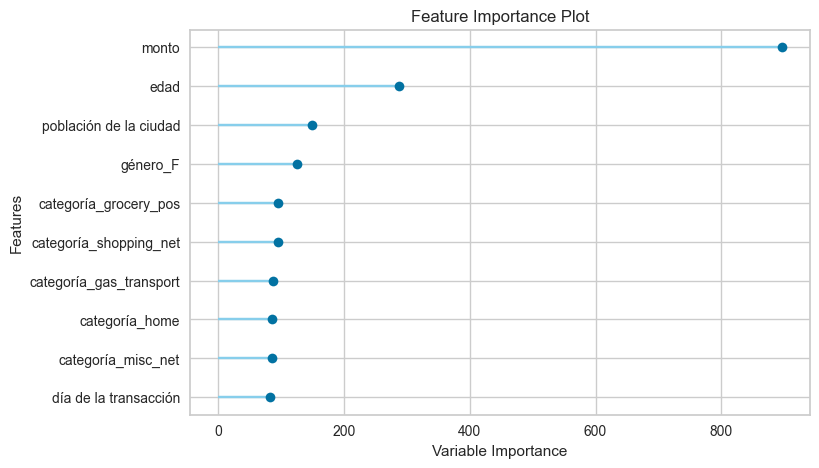

In [90]:
# Graficar la importancia de todas las variables
plot_model(best_model, plot='feature')

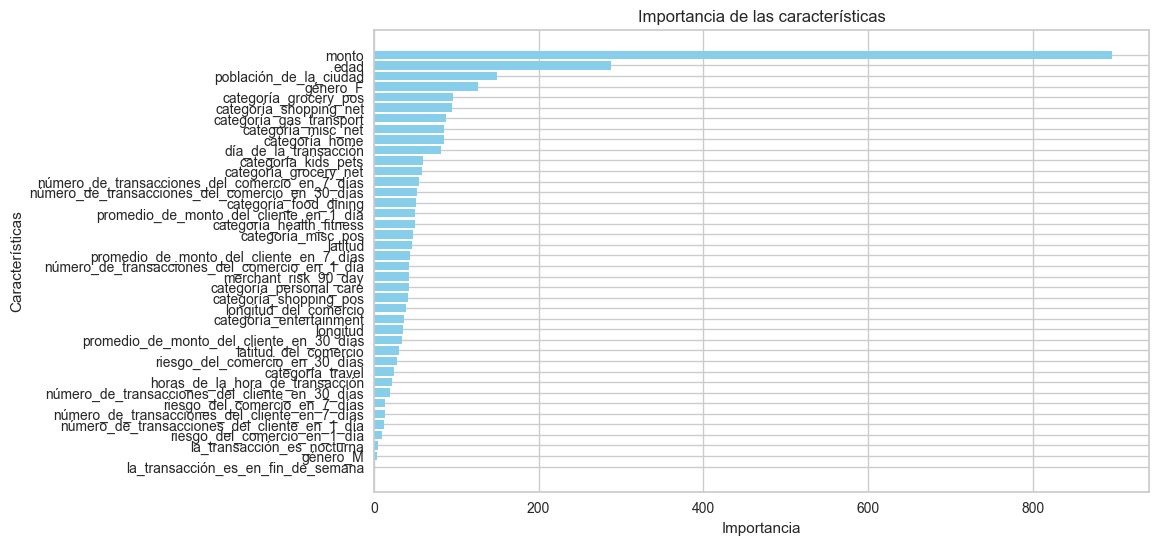

In [91]:

# Extraer importancias de las características
importances = best_model.feature_importances_
features = best_model.feature_names_in_

# Crear un DataFrame con las importancias
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Graficar todas las características
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las características')
plt.gca().invert_yaxis()
plt.show()


In [92]:
# Mejorar el modelo usando tune_model
tuned_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9316,0.9843,0.9338,0.9298,0.9318,0.8633,0.8633
1,0.9322,0.9841,0.9354,0.9295,0.9325,0.8645,0.8645
2,0.9306,0.9832,0.9321,0.9294,0.9308,0.8613,0.8613
3,0.9293,0.9824,0.9345,0.9249,0.9297,0.8585,0.8586
4,0.9297,0.9829,0.9290,0.9304,0.9297,0.8595,0.8595
5,0.9326,0.9837,0.9352,0.9305,0.9328,0.8653,0.8653
6,0.9278,0.9824,0.9290,0.9269,0.9279,0.8556,0.8556
7,0.9332,0.9838,0.9353,0.9315,0.9334,0.8664,0.8664
8,0.9340,0.9838,0.9385,0.9302,0.9343,0.8680,0.8681


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [93]:
# Evaluar el modelo
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [94]:
# Guardar el modelo
save_model(tuned_model, 'model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['latitud', 'longitud',
                                              'población de la ciudad', 'edad',
                                              'monto', 'latitud del comercio',
                                              'longitud del comercio',
                                              'número de transacciones del '
                                              'cliente en 1 día',
                                              'número de transacciones del '
                                              'cliente en 7 días',
                                              'número de transacciones del '
                                              'cliente en 30 días',
                                              'horas de la hor...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,

In [ ]:
# predecir usando pycaret usando una fila inventada 
predict_model(tuned_model)
